In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [15]:
x = np.arange(0,20,1)

In [16]:
iterable = (val*2+5*(2*(random.randint(0,100)/100)) for val in x)
y = np.fromiter(iterable, np.float)

In [17]:
print(x)
print(y)
print('')
print(f'Length of x:  {len(x)}')
print(f'Length of y:  {len(y)}')
print(x.shape)
print(y.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 3.5  4.5  6.5 12.3  9.4 10.7 17.8 15.2 22.7 24.6 20.4 29.1 25.7 30.1
 29.4 33.9 37.8 38.8 41.7 45.9]

Length of x:  20
Length of y:  20
(20,)
(20,)


In [26]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(f'Length of x:  {len(x)}')
print(f'Length of y:  {len(y)}')
print(x.shape)
print(y.shape)

Length of x:  20
Length of y:  20
(20, 1)
(20, 1)


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_pred = regressor.predict(x)

In [21]:
r2 = np.around(regressor.score(x,y),2)
slope = np.around(regressor.coef_[0][0], 2)
intercept = np.around(regressor.intercept_[0],2)
reg_eq = f' y = {slope}x + {intercept} \nr2 = {r2}'

In [22]:
print(reg_eq)

 y = 2.14x + 2.68 
r2 = 0.97


The following plots the X and Y values on the left plot, and the predicted Y against the original Y on the right plot.<br><br>
The right plot, contains a x = y line for reference. Depending on how well the prediction went, data points should lie close to this line.

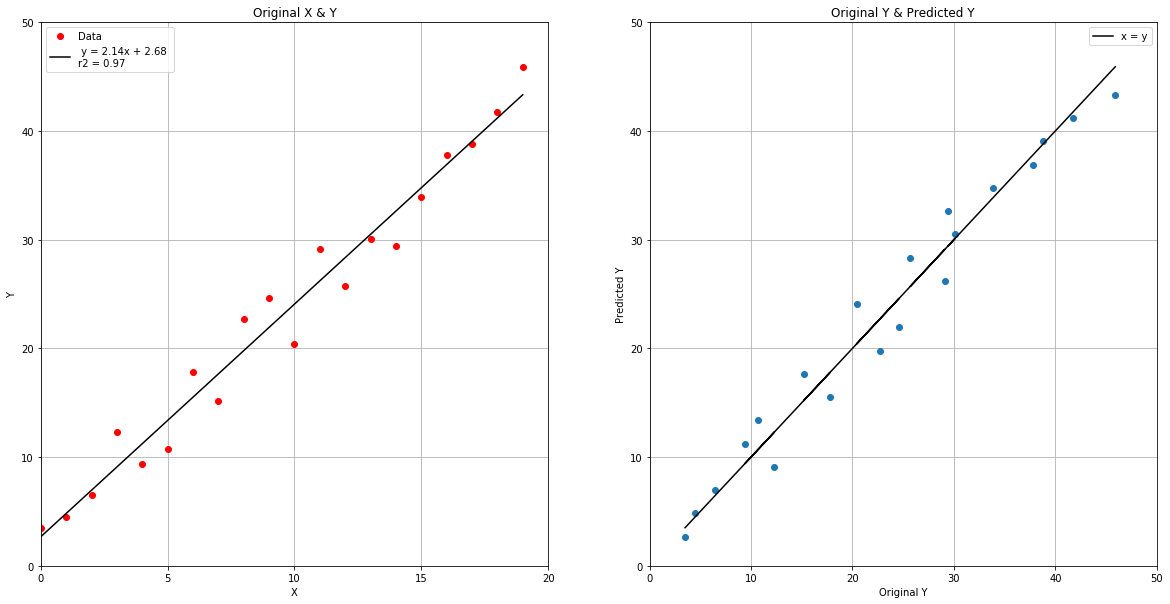

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1.plot(x, y, marker='o', c='red',ls='', label='Data')
ax1.plot(x, regressor.predict(x), color='black',label=reg_eq)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,20)
ax1.set_xticks([0,5,10,15,20])
ax1.set_ylim(0,50)
ax1.set_title('Original X & Y')
ax1.grid()
ax1.legend()

ax2.plot(y, y_pred, marker='o', ls='')
ax2.plot(y, y, color='black', label='x = y')
ax2.set_xlabel('Original Y')
ax2.set_ylabel('Predicted Y')
ax2.set_xlim(0,50)
ax2.set_ylim(0,50)
ax2.set_title('Original Y & Predicted Y')
ax2.grid()
ax2.legend()


In [11]:
import statsmodels.api as sm
x = sm.add_constant(x)
regressor_OLS = sm.OLS(endog=y, exog=x).fit()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     266.2
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           3.14e-12
Time:                        13:47:23   Log-Likelihood:                -51.359
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7214      1.433      3.294      0.004       1.710       7.733
x1             2.1041      0.129     16.314      0.000       1.833       2.375
==============================================================================
Omnibus:                        1.217   Durbin-Watson:                   2.444
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.015
Skew:                          -0.343   Prob(JB):                        0.602
Kurtosis:                       2.135   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""